In [50]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
rides= pd.read_csv(r"C:\Study Hub\notebooks\TrafficPrediction\cab_rides.csv")
weather= pd.read_csv(r"C:\Study Hub\notebooks\TrafficPrediction\weather.csv")

In [52]:
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [53]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [54]:
rides.shape, weather.shape

((693071, 10), (6276, 8))

# Start by cleaning, exploring, and analyzing the rides dataset before working on weather data

In [55]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [56]:
rides.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [57]:
# Convert timestamps to datetime and extract hour and date feature
rides['time_stamp'] = pd.to_datetime(rides['time_stamp'], unit='ms')
rides['hour'] = rides['time_stamp'].dt.hour
rides['date'] = rides['time_stamp'].dt.date

In [58]:
print(rides[['time_stamp', 'hour', 'date']].head())

               time_stamp  hour        date
0 2018-12-16 09:30:07.890     9  2018-12-16
1 2018-11-27 02:00:23.677     2  2018-11-27
2 2018-11-28 01:00:22.198     1  2018-11-28
3 2018-11-30 04:53:02.749     4  2018-11-30
4 2018-11-29 03:49:20.223     3  2018-11-29


In [59]:
rides= rides.drop(columns=['product_id', 'id'])

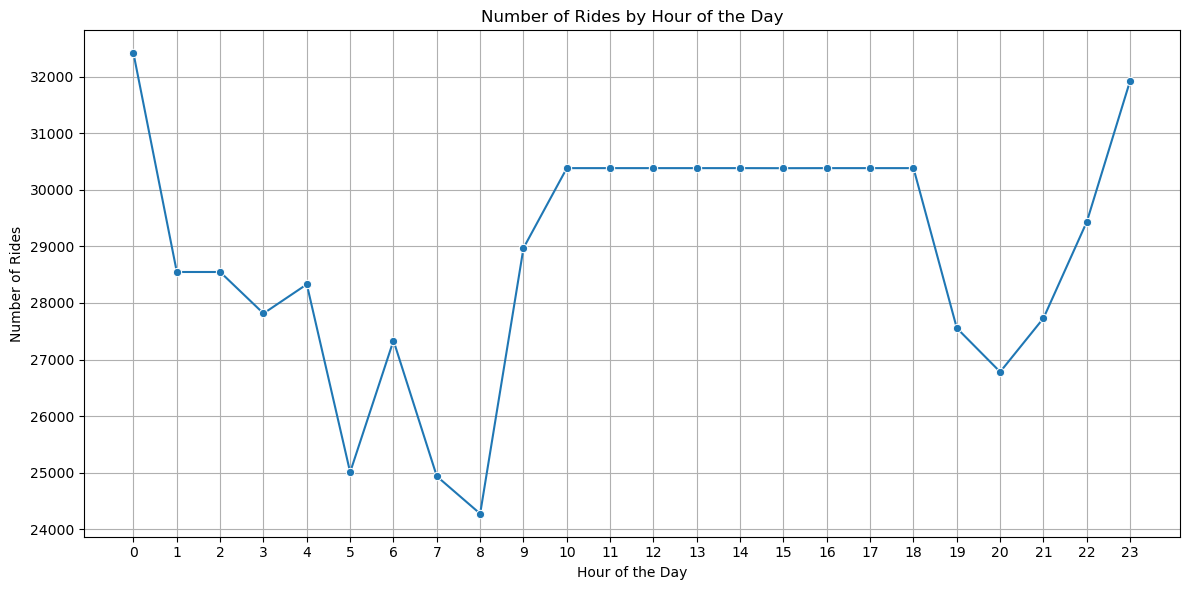

In [60]:
# Number of trips by hour of the day
rides_by_hour= rides.groupby('hour').size().reset_index(name='ride_count')
plt.figure(figsize=(12,6))
ax= sns.lineplot(data= rides_by_hour, x='hour', y='ride_count', marker='o')
ax.set_title("Number of Rides by Hour of the Day", fontdict= {'fontsize':12})
ax.set_xlabel("Hour of the Day", fontdict= {'fontsize':10})
ax.set_ylabel("Number of Rides", fontdict= {'fontsize':10})
plt.xticks(range(0,24))
plt.grid()
plt.tight_layout()
plt.show()

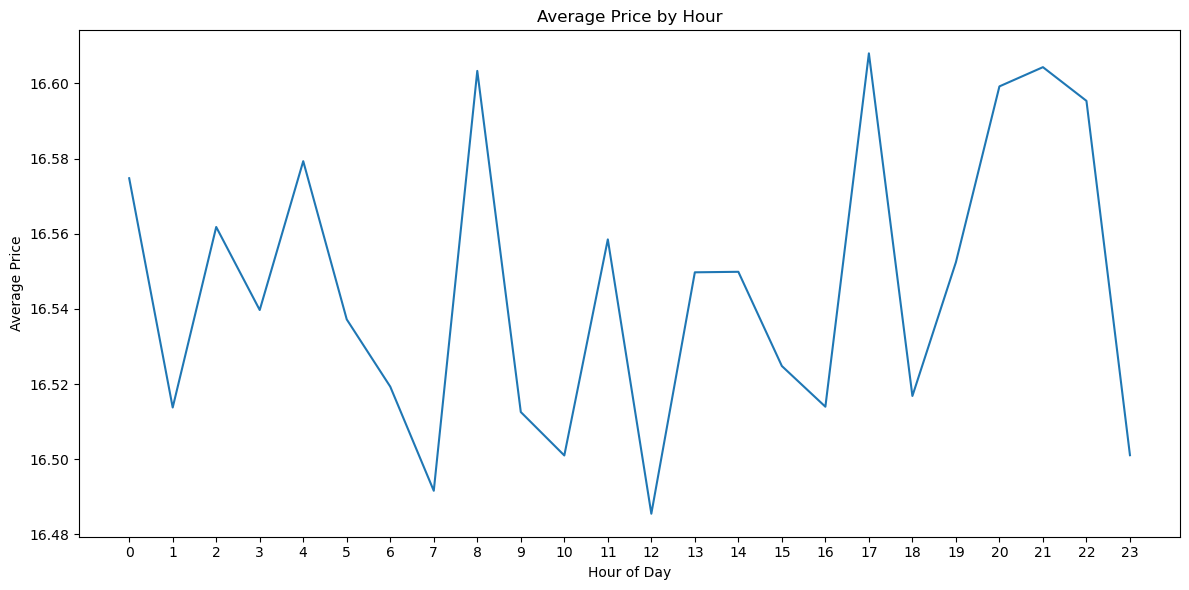

In [61]:
# Average trip price by hour of the day
avg_price_per_hour= rides.groupby('hour')['price'].mean().reset_index()
plt.figure(figsize= (12,6))
ax= sns.lineplot(data= avg_price_per_hour, x= 'hour', y= 'price', markers= "o")
ax.set_title("Average Price by Hour")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Average Price")
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

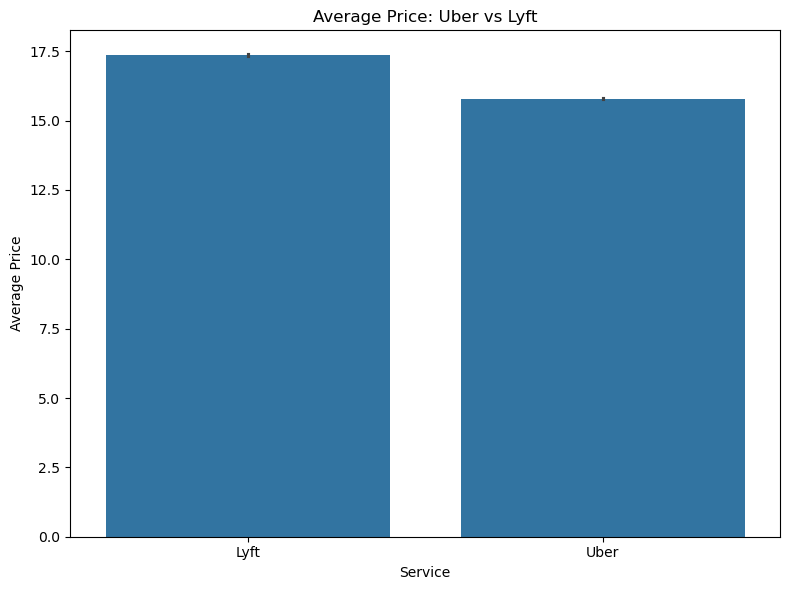

In [62]:
# Average Price: Uber vs Lyft
plt.figure(figsize=(8,6))
ax = sns.barplot(data=rides, x="cab_type", y="price", estimator="mean")
ax.set_title("Average Price: Uber vs Lyft")
ax.set_xlabel("Service")
ax.set_ylabel("Average Price")
plt.tight_layout()
plt.show()

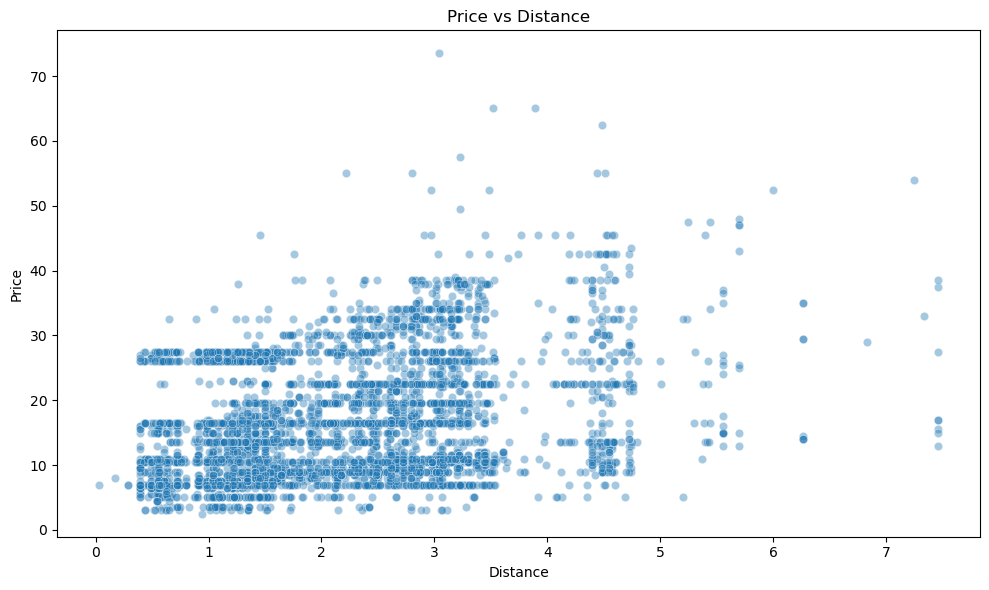

In [63]:
# Relationship between price and distance
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=rides.sample(5000), x="distance", y="price", alpha=0.4)
ax.set_title("Price vs Distance")
ax.set_xlabel("Distance")
ax.set_ylabel("Price")
plt.tight_layout()
plt.show()

In [64]:
# Check for missing values
rides.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
name                    0
hour                    0
date                    0
dtype: int64

In [65]:
# Rows with missing price values are removed since price is the target variable. Imputing it could bias the model and harm prediction accuracy.
rides.dropna(subset=['price'], inplace=True)

In [66]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          637976 non-null  float64       
 1   cab_type          637976 non-null  object        
 2   time_stamp        637976 non-null  datetime64[ns]
 3   destination       637976 non-null  object        
 4   source            637976 non-null  object        
 5   price             637976 non-null  float64       
 6   surge_multiplier  637976 non-null  float64       
 7   name              637976 non-null  object        
 8   hour              637976 non-null  int32         
 9   date              637976 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 51.1+ MB


In [67]:
rides.describe()

,distance,time_stamp,price,surge_multiplier,hour
count,637976.000000,637976,637976.000000,637976.000000,637976.000000
mean,2.189261,2018-12-05 21:34:05.413373440,16.545125,1.015068,11.618528
min,0.020000,2018-11-26 03:40:46.318000,2.500000,1.000000,0.000000
25%,1.270000,2018-11-28 22:26:08.211000064,9.000000,1.000000,6.000000
50%,2.160000,2018-12-02 07:52:59.568000,13.500000,1.000000,12.000000
75%,2.930000,2018-12-14 22:45:04.678000128,22.500000,1.000000,18.000000
max,7.860000,2018-12-18 19:15:10.943000,97.500000,3.000000,23.000000
std,1.135413,NaN,9.324359,0.095422,6.948776


In [68]:
rides.surge_multiplier.value_counts()

surge_multiplier
1.00    617001
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: count, dtype: int64

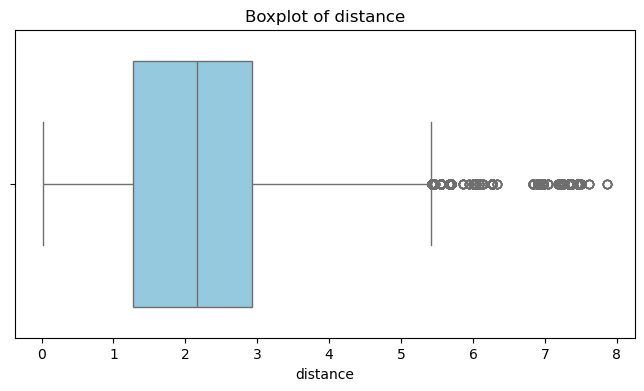

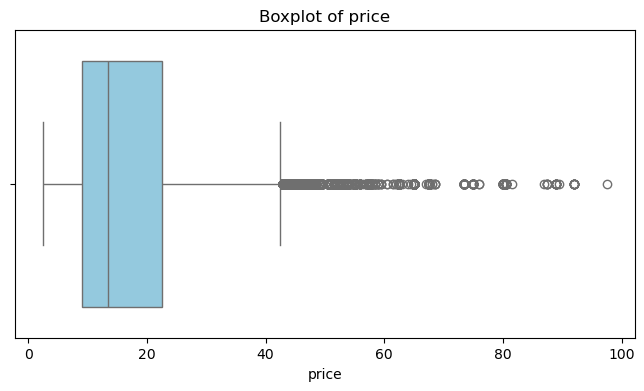

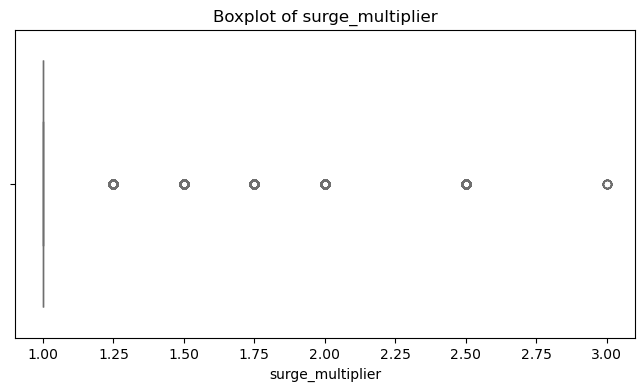

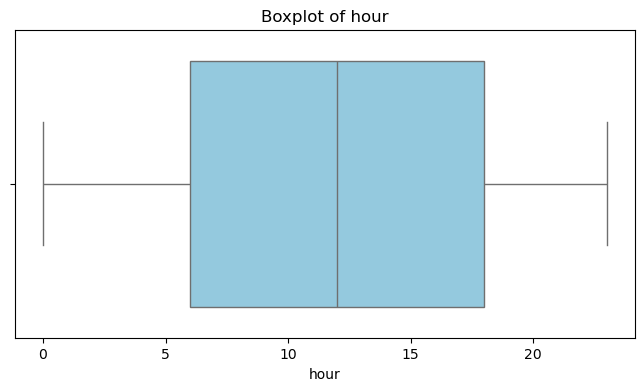

In [69]:
# Detect outliers
numeric_col= rides.select_dtypes(include=np.number).columns.tolist()
for col in numeric_col:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=rides[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()


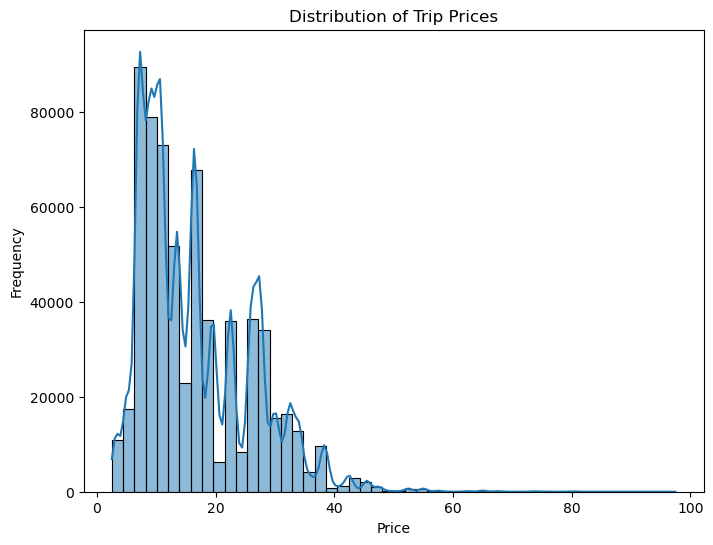

In [70]:
# Target distribution
plt.figure(figsize=(8,6))
sns.histplot(rides['price'], bins=50, kde=True)
plt.title("Distribution of Trip Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

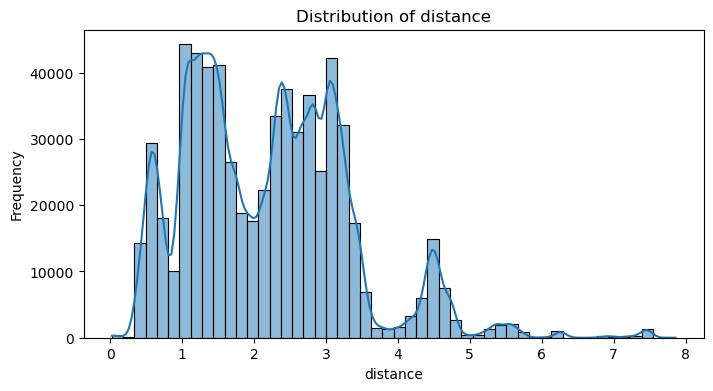

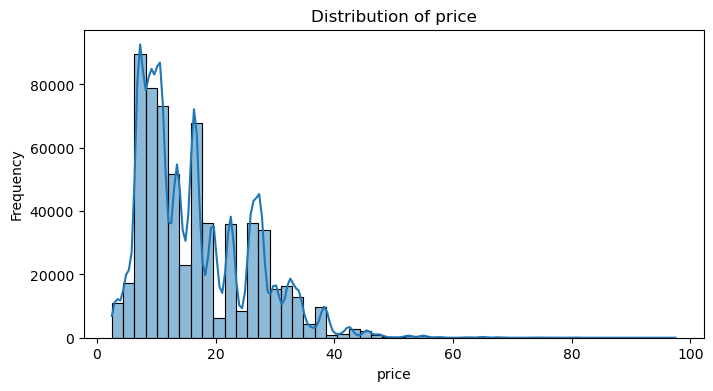

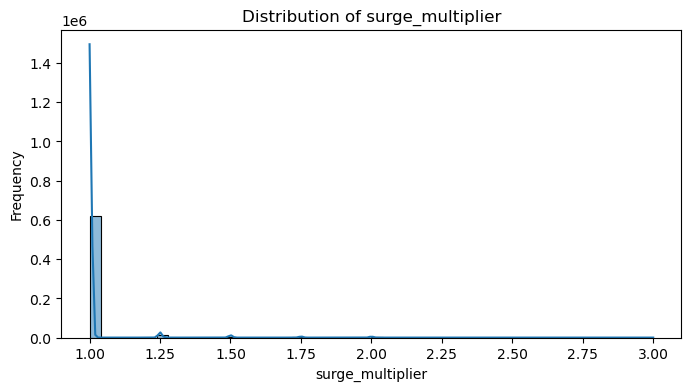

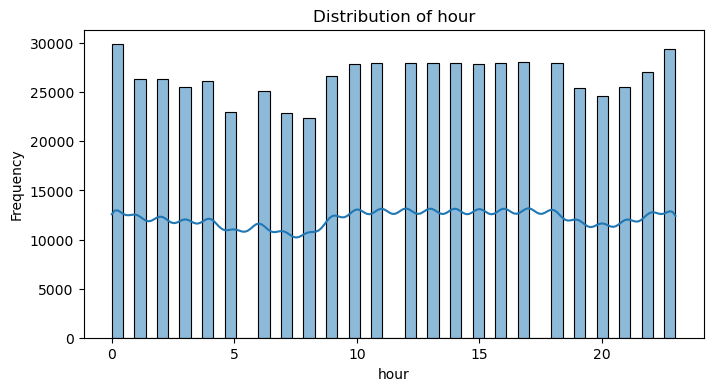

In [71]:
# plot distribution for numeric features
for col in numeric_col:
    plt.figure(figsize=(8,4))
    sns.histplot(rides[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Working on Weather Data

In [72]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [73]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [74]:
weather['time_stamp'] = pd.to_datetime(weather['time_stamp'], unit='s')
weather['hour'] = weather['time_stamp'].dt.hour
weather['date'] = weather['time_stamp'].dt.date

In [75]:
print(weather[['time_stamp', 'hour', 'date']].head())

           time_stamp  hour        date
0 2018-12-16 23:45:01    23  2018-12-16
1 2018-12-16 23:45:01    23  2018-12-16
2 2018-12-16 23:45:01    23  2018-12-16
3 2018-12-16 23:45:01    23  2018-12-16
4 2018-12-16 23:45:01    23  2018-12-16


In [76]:
# Check for missing values
weather.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
hour             0
date             0
dtype: int64

In [77]:
weather.drop(columns=['rain'], axis=1, inplace=True)

In [78]:
weather.duplicated().sum()

np.int64(0)

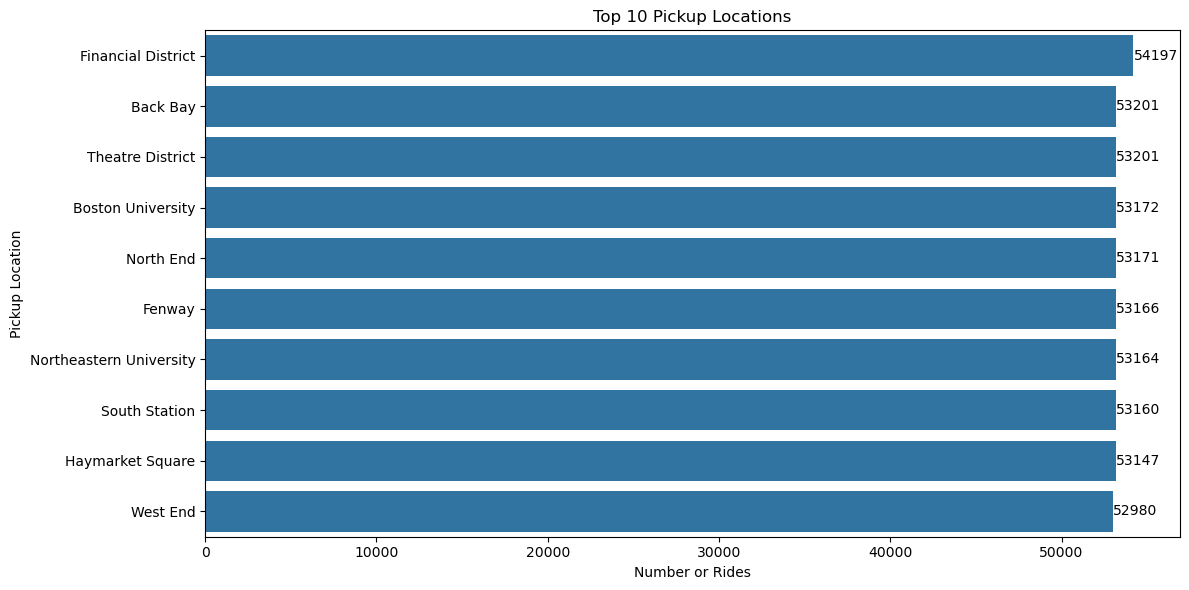

In [79]:
# Top 10 locations that recieve the most trip request
top_locations= rides['source'].value_counts().head(10).reset_index()
top_locations.columns= ['source', 'count']
plt.figure(figsize=(12,6))
ax= sns.barplot(data= top_locations, x= 'count', y= 'source')
ax.set_title("Top 10 Pickup Locations", fontdict= {'fontsize':12})
ax.set_xlabel("Number or Rides", fontdict= {'fontsize':10})
ax.set_ylabel("Pickup Location", fontdict= {'fontsize':10})
## Display the value on top of each bar
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Humidity')

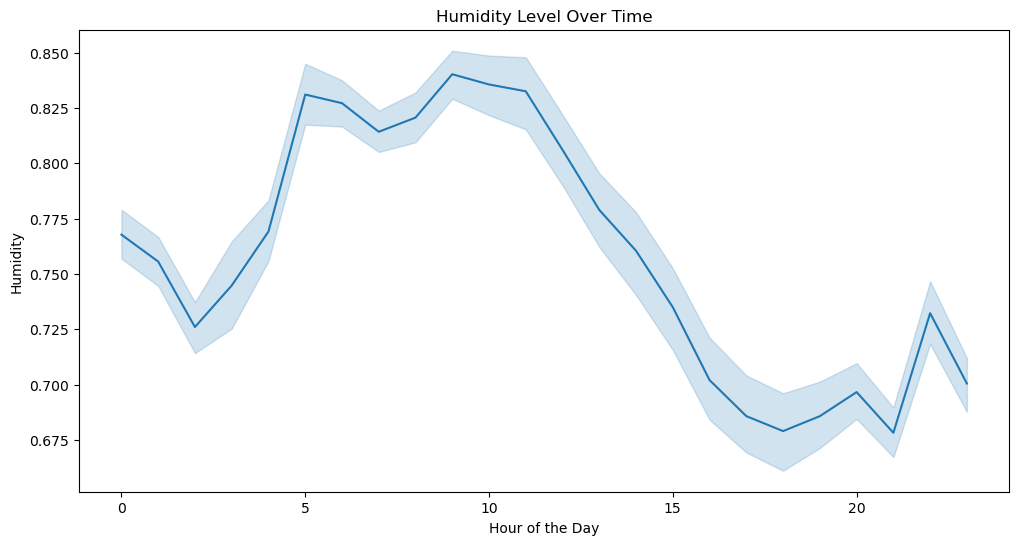

In [80]:
# Humidity Level Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=weather, x='hour', y='humidity')
plt.title('Humidity Level Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Humidity')

## Aggregate weather data by location, date, and hour, then merge with rides

In [81]:
# Aggregate weather data to ensure one record per location, date, and hour
weather_unique = (
    weather
    .groupby(['location', 'date', 'hour'], as_index=False)
    .agg({
        'temp': 'mean',
        'clouds': 'mean',
        'pressure': 'mean',
        'humidity': 'mean',
        'wind': 'mean'
    })
)

In [82]:
# Merge rides data with aggregated weather data
merged = rides.merge(
    weather_unique,
    left_on=['source', 'date', 'hour'],
    right_on=['location', 'date', 'hour'],
    how='left'
)

In [83]:
# Drop duplicate location column after merge
merged.drop(columns=['location'], inplace=True)

In [84]:
merged.shape

(637976, 15)

In [85]:
merged.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,hour,date,temp,clouds,pressure,humidity,wind
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,Shared,9,2018-12-16,38.460,0.290000,1022.25,0.760000,7.68
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,Lux,2,2018-11-27,44.065,0.995000,1002.88,0.895000,12.63
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,Lyft,1,2018-11-28,NaN,NaN,NaN,NaN,NaN
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,4,2018-11-30,35.080,0.000000,1013.71,0.700000,5.25
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,Lyft XL,3,2018-11-29,37.680,0.433333,998.42,0.706667,11.16


In [86]:
merged.isna().sum()

distance               0
cab_type               0
time_stamp             0
destination            0
source                 0
price                  0
surge_multiplier       0
name                   0
hour                   0
date                   0
temp                2734
clouds              2734
pressure            2734
humidity            2734
wind                2734
dtype: int64

In [87]:
merged.duplicated().sum()

np.int64(71)

In [88]:
# delete missing values
merged.dropna(inplace=True)

In [89]:
merged.shape

(635242, 15)

In [90]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635242 entries, 0 to 637975
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          635242 non-null  float64       
 1   cab_type          635242 non-null  object        
 2   time_stamp        635242 non-null  datetime64[ns]
 3   destination       635242 non-null  object        
 4   source            635242 non-null  object        
 5   price             635242 non-null  float64       
 6   surge_multiplier  635242 non-null  float64       
 7   name              635242 non-null  object        
 8   hour              635242 non-null  int32         
 9   date              635242 non-null  object        
 10  temp              635242 non-null  float64       
 11  clouds            635242 non-null  float64       
 12  pressure          635242 non-null  float64       
 13  humidity          635242 non-null  float64       
 14  wind     

In [91]:
merged.surge_multiplier.value_counts()

surge_multiplier
1.00    614358
1.25     11042
1.50      5040
1.75      2408
2.00      2228
2.50       154
3.00        12
Name: count, dtype: int64

In [92]:
count= merged.surge_multiplier!=1
nums= count.sum()

In [93]:
surge1= merged[merged.surge_multiplier==1]
surge_not1= merged[merged.surge_multiplier!=1]
surge_1_sample= surge1.sample(n=100000 - nums, random_state=42)
final_df= pd.concat([surge_1_sample, surge_not1], axis=0, ignore_index=True)
final_df.shape

(100000, 15)

In [94]:
final_df['surge_multiplier'].value_counts()

surge_multiplier
1.00    79116
1.25    11042
1.50     5040
1.75     2408
2.00     2228
2.50      154
3.00       12
Name: count, dtype: int64

In [95]:
merged.shape

(635242, 15)

In [96]:
merged.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,hour,date,temp,clouds,pressure,humidity,wind
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,Shared,9,2018-12-16,38.460,0.290000,1022.25,0.760000,7.68
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,Lux,2,2018-11-27,44.065,0.995000,1002.88,0.895000,12.63
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,4,2018-11-30,35.080,0.000000,1013.71,0.700000,5.25
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,Lyft XL,3,2018-11-29,37.680,0.433333,998.42,0.706667,11.16
5,0.44,Lyft,2018-12-17 18:25:12.138,North Station,Haymarket Square,16.5,1.0,Lux Black,18,2018-12-17,40.780,0.930000,1000.15,0.790000,7.55


In [97]:
final_df.to_csv("merged_rieds_weather_100000.csv")
merged.to_csv("merged_rides_weather_full.csv")